In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn import linear_model

data = pd.read_csv("online_classroom.csv")


In [2]:
target = 'falsexam'
treatment = 'format_ol'

In [3]:
# Efecto a primera vista
data.query("format_ol == 1").falsexam.mean()

73.63526308510637

In [4]:
data.query("format_ol != 1").falsexam.mean()

77.85552344978166

Por propiedades de la regresión lineal (que no veremo en este curso de momento) las $\beta_i$ son realmente un promedio de las variables categoricas.

Quiere decir que podríamos usar una regresión para probar hipotesis

In [5]:
# Regresion
model = smf.ols("falsexam ~ format_ol", data=data).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,77.8555,0.762,102.235,0.000,76.357,79.354
format_ol,-4.2203,1.412,-2.990,0.003,-6.998,-1.443


El modelo nos da el coeficiente, que es exactamente igual a la diferencia de los promedios

#### Intentando estimar la variabilidad de $\beta$, resampleo

In [11]:
coeficiente = []
for i in range(500):
    my_data = data.sample(len(data), replace = True)
    X = my_data[['format_ol']]
    y = my_data['falsexam']
    model = linear_model.LinearRegression().fit(X,y)
    coeficiente.append(model.coef_[0])

In [12]:
np.std(coeficiente)

1.6723501958069813

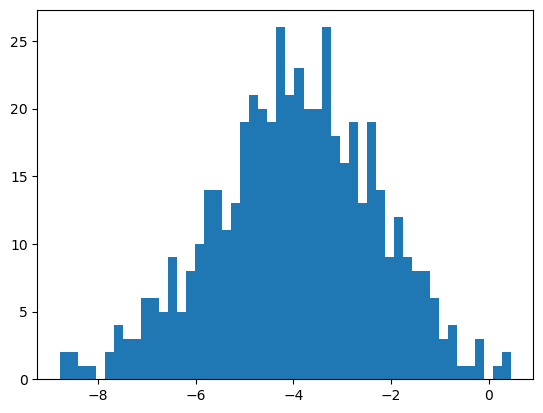

In [13]:
plt.hist(coeficiente, bins = 50)
plt.show()

#### Varianza de los residuos
$\hat{\sigma^2} = \frac{\sum(y - \hat{y})^2}{n - p - 1}$

Donde:

$n$  es el total de datos

$p$ total de variables

Esto sería simplemente el error cuadrático promedio de mi modelo 

#### Variabilidad de lo que usas para predecir 

Suma de los cuadrados de X  =$\sum (x - \hat{x_i})^2$

Esto es la varianza de tu predictor pero sin dividir entre n

#### Varianza del coeficiente $\beta$

$SE(\beta)$ = $\sqrt{\frac{\hat{\sigma^2}}{\sum (x - \hat{x_i})^2}}$


In [18]:
X = data[['format_ol']]
y = data['falsexam']
model = linear_model.LinearRegression().fit(X,y)

predicciones = model.predict(X)

residuos = np.sum((y-predicciones)**2) / (len(y) - 1 - 1)

suma_cuadrada = np.sum((X - np.mean(X))**2)

se = np.sqrt(residuos / suma_cuadrada)

se

C:\Users\arant\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


format_ol    1.411646
dtype: float64

### Estadístico t

$t = \lvert \frac{\beta_i}{SE(\beta_i)} \rvert$

nos dice cuántas desviaciones estándar $\beta$ está  lejos de cero.

Ojo: la distibución $t$ es simetrica y puede ser del lado derecho o izquierdo, habría que multiplicar este p value por dos



In [19]:
t = np.abs(model.coef_[0] / se)

P - Value

$2 * P(T > \lvert t \rvert)$

Si bien el estadístico t nos dice cuantas desviaciones estandard está por arriba de 0, puede ser a cualquier lado 

- Si t es muy positivo, queremos ver la probabilidad de obtener un valor tan alto o mayor.

- Si t es muy negativo, queremos ver la probabilidad de obtener un valor tan bajo o menor.

In [20]:
2 * (1-stats.t.cdf(abs(t), df = len(data)))

array([0.00300786])

P-value

1 - stats.t.cdf(abs(t), df=len(data))

In [23]:
model.coef_[0] - 1.96*se

format_ol   -6.987087
dtype: float64

Intervalos de confianza

In [24]:
model.coef_[0] + 1.96*se

format_ol   -1.453434
dtype: float64

### Usando stats model 

Sklearn no nos da el intervalo de confianza ni el valor P de los estimados, afortunadamente statsmodel si nos lo puede dar

In [25]:
model = smf.ols("falsexam ~ format_ol", data=data).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,77.8555,0.762,102.235,0.000,76.357,79.354
format_ol,-4.2203,1.412,-2.990,0.003,-6.998,-1.443


### Volviendo al ejemplo de las casas

median_income y total_rooms

In [9]:
df = pd.read_csv('housing.csv')